<a href="https://colab.research.google.com/github/praveenprabharavindran/MachineLearning/blob/main/ANN_Handwritten_Digits/ANN_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load the dataset

## Import the mnist dataset

In [ ]:
# Import the mnist dataset
from tensorflow.keras.datasets import mnist

## Split into Train and Test

In [ ]:
# Split into Train and test
(x_train,y_train),(x_test,y_test)=mnist.load_data()

## Inspect the data

In [ ]:
# Inspect the data
print('Train labels y_train[:5]',y_train[:5])
print('Test labels y_train[:5]',y_test[:5])

print('Shape of x_train',x_train.shape)
print('Shape of y_train',y_train.shape)

Train labels y_train[:5] [5 0 4 1 9]
Test labels y_train[:5] [7 2 1 0 4]
Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)


## Visualize the data

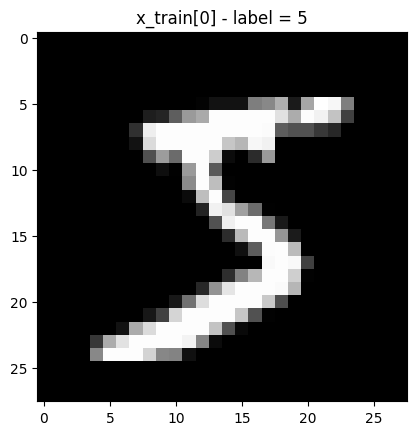

In [ ]:
import matplotlib.pyplot as plt
plt.title('x_train[0] - label = ' + str(y_train[0]))
plt.imshow(x_train[0],cmap='gray')

# 2. Preprocess the dataset

## Normalize the pixel value in training and test data

The MNIST dataset consists of grayscale images where each pixel's value ranges from 0 to 255, with 0 being completely black and 255 being completely white. Normalizing the pixel values by dividing them by 255.0 scales all the pixel values to the range of 0 to 1. This is important for several reasons:

* Numerical Stability: Machine learning models, particularly deep neural networks, tend to perform better when input features are within a similar numerical range. Normalizing helps in achieving numerical stability during training.

* Faster Convergence: Normalized inputs can lead to faster convergence during the training of neural networks. It can help in gradient descent-based optimization algorithms to find the optimal weights and biases more efficiently.

* Regularization: Normalization can act as a form of regularization, making the model less prone to overfitting by preventing large input values from dominating the learning process.

* Compatibility with Activation Functions: Some activation functions (like the sigmoid and tanh functions) perform better when inputs are within a specific range, typically -1 to 1. Normalization helps to bring the data within these ranges.

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

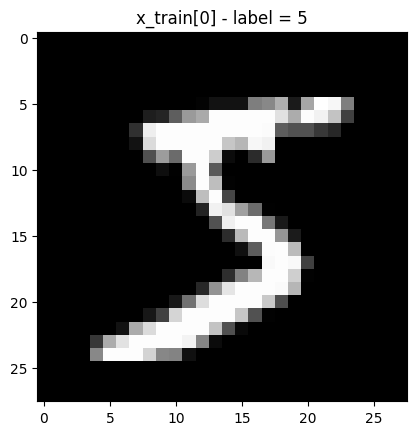

In [ ]:
# plot and inspect a sample image from training data after normalization
plt.title('x_train[0] - label = ' + str(y_train[0]))
plt.imshow(x_train[0],cmap='gray')

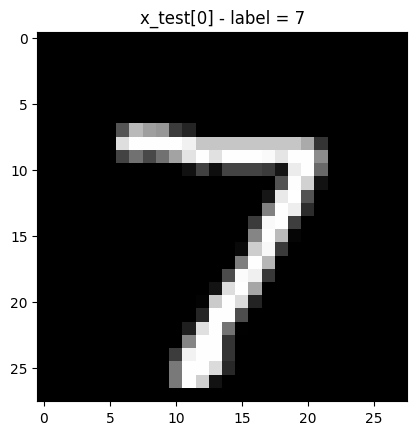

In [ ]:
# plplot and inspect a sample image from test data after normalization
plt.title('x_test[0] - label = ' + str(y_test[0]))
plt.imshow(x_test[0],cmap='gray')

# 3. Create an ANN Model

In [ ]:
# Import the necessary classes from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
# define the model
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='sigmoid',name='dense-128-relu'))
model.add(Dense(10,activation='softmax',name='dense-10-softmax'))

In [ ]:
# print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense-128-relu (Dense)      (None, 128)               100480    
                                                                 
 dense-10-softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# define batch size and epochs
batch_size=128
epochs=10

In [ ]:
history=model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5850 - accuracy: 0.8632 - val_loss: 0.3049 - val_accuracy: 0.9164
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2733 - accuracy: 0.9234 - val_loss: 0.2375 - val_accuracy: 0.9322
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2197 - accuracy: 0.9380 - val_loss: 0.2019 - val_accuracy: 0.9424
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1846 - accuracy: 0.9477 - val_loss: 0.1739 - val_accuracy: 0.9480
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1590 - accuracy: 0.9553 - val_loss: 0.1537 - val_accuracy: 0.9538
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1388 - accuracy: 0.9604 - val_loss: 0.1392 - val_accuracy: 0.9581
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1227 - accuracy: 0.9650 - val_loss: 0.1274 - val_accuracy: 0.9610
Epoch 

In [ ]:
score=model.evaluate(x_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9789


In [ ]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9670


<function matplotlib.pyplot.show(close=None, block=None)>

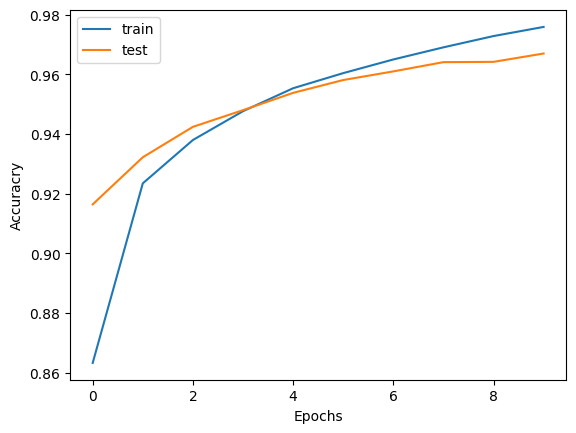

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracry')
plt.legend(['train','test'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

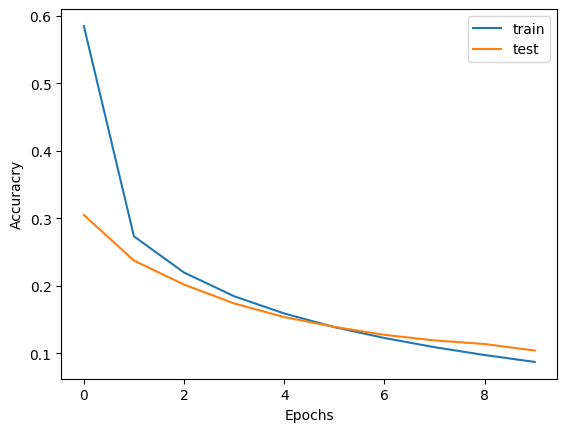

In [ ]:
# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracry')
plt.legend(['train','test'])
plt.show

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
import numpy as np

In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
(train_input,train_label),(test_input,test_label)=mnist.load_data()

In [ ]:
test_label.shape

(10000,)

In [ ]:
print('y_pred',y_pred[:5])
print('test_label',test_label[:5])


y_pred [7 2 1 0 4]
test_label [7 2 1 0 4]


In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(test_label ,y_pred)
print(matrix)

[[ 968    0    2    1    1    3    1    1    1    2]
 [   0 1120    4    0    0    1    4    0    6    0]
 [   6    2  993    4    4    2    2    6   12    1]
 [   0    0    8  977    0    3    0    9    9    4]
 [   1    0    5    0  949    1    5    2    2   17]
 [   3    1    0   13    3  854    6    1    9    2]
 [   9    3    2    1    5    7  924    0    7    0]
 [   1    3   16    6    0    1    0  988    2   11]
 [   4    1    2    7    4    5    3    5  943    0]
 [   2    6    0    9   17    5    1    7    8  954]]


<Axes: >

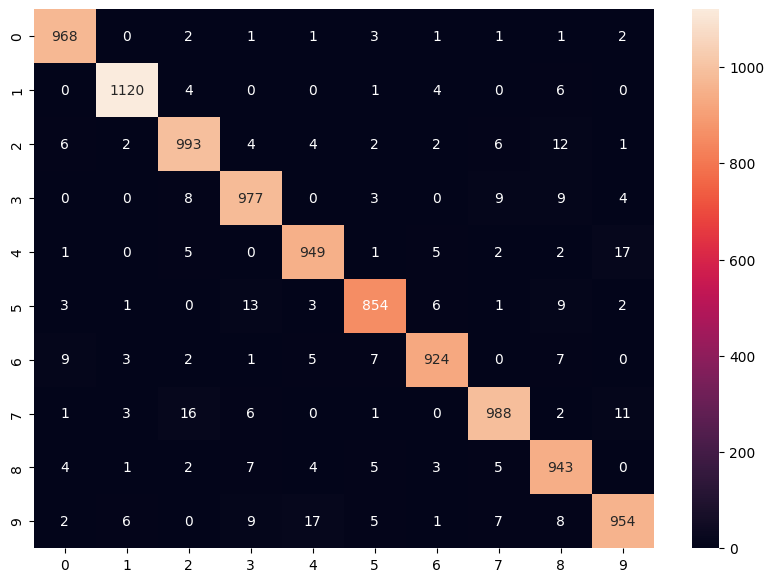

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='d')

In [ ]:
# save model
#model.save("ANN_Handwritten_model.h5")